## **Download Model**

In [1]:
!gdown 1w-ocKLshSpSxzOgJdd0gdfx95FITizJX
!gdown 1QRmEXcEScQl6I58PJrqIiGfH9taWml4v
!gdown 1WBCJOZU7Xywbbj8-4BIYIK5XBNzaEXCx

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1w-ocKLshSpSxzOgJdd0gdfx95FITizJX 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1QRmEXcEScQl6I58PJrqIiGfH9taWml4v 

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1WBCJOZU7Xywbbj8-4BIYIK5XBNzaEXCx 



## **Download Transformer Library**

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.8 MB/s 
     |████████████████████████████████| 182 kB 66.3 MB/s 
     |████████████████████████████████| 7.6 MB 45.7 MB/s 


## **Import Library**

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import re
import transformers
from transformers import BertTokenizer, BertConfig
import tensorflow as tf

## **Load Data Test**

In [4]:
df_url='https://drive.google.com/uc?id=' + '1O7oGpFkJCNYo6E_eJEaBUFClD4deLFwG'
df = pd.read_csv(df_url)
df

,title,text,subject,date,output
0,“peaceful” muslims scream: “this is for allah”...,anoth day holi month ramadan london scene carn...,politics,"Jun 3, 2017",1
1,france warns of ballistic proliferation after ...,pari reuter franc foreign minist sunday said b...,worldnews,"November 5, 2017",0
2,why anti-trump billionaire mark cuban couldn’t...,presidenti electionk cuban made secret dislik ...,politics,"Oct 4, 2017",1
3,breaking wikileaks: hillary email exposes her ...,wikileak releas email guess hillari detest eve...,politics,"Oct 11, 2016",1
4,pence delays middle east trip in case needed f...,washington reuter us vice presid mike penc del...,politicsnews,"December 14, 2017",0
...,...,...,...,...,...
13244,u.s. coal miners hit congress to rally for pen...,washington reuter retir coal miner famili desc...,politicsnews,"September 8, 2016",0
13245,minnesota governor's veto of legislative fundi...,reuter minnesota governork dayton ' sveto fund...,politicsnews,"July 19, 2017",0
13246,trump’s first congressional speech stuns media...,st centuri wire say last night embattl presid ...,us_news,"March 1, 2017",1
13247,watch: racist congresswoman maxine waters won’...,close eye pictur speaker hous paul ryan rwi te...,left-news,"Aug 7, 2017",1


## **Feature Engineering**

In [5]:
corpus = df["text"]
maxlen = 50

## tambahkan special tokens
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
maxqnans = np.int((maxlen-20)/2)
corpus_tokenized = ["[CLS] "+
             " ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '', str(txt).lower().strip()))[:maxqnans])+
             " [SEP] " for txt in corpus]

## membuat masks
masks = [[1]*len(txt.split(" ")) + [0]*(maxlen - len(txt.split(" "))) for txt in corpus_tokenized]
    
## membuat padding
txt2seq = [txt + " [PAD]"*(maxlen-len(txt.split(" "))) if len(txt.split(" ")) != maxlen else txt for txt in corpus_tokenized]
    
## membuat idx
idx = [tokenizer.convert_tokens_to_ids(seq.split(" ")) for seq in txt2seq]
    
## membuat segments
segments = [] 
for seq in txt2seq:
    temp, i = [], 0
    for token in seq.split(" "):
        temp.append(i)
        if token == "[SEP]":
             i += 1
    segments.append(temp)
## membuat fitur matrix
X_test = [np.asarray(idx, dtype='int32'),
          np.asarray(masks, dtype='int32'),
          np.asarray(segments, dtype='int32')]
y_test = df["output"].values

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

<ipython-input-5-8604bac9e157>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  maxqnans = np.int((maxlen-20)/2)
Token indices sequence length is longer than the specified maximum sequence length for this model (872 > 512). Running this sequence through the model will result in indexing errors


# **Model 1**

## Load Model

In [6]:
model_1 = tf.keras.models.load_model('model_1.h5', custom_objects={"TFBertModel": transformers.TFBertModel.from_pretrained("bert-base-uncased")})

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


OSError: ignored

## Predict Data Test

In [ ]:
# test model
predicted_1 = model_1.predict(X_test)
predicted_1 = list(np.concatenate(predicted_1).flat)
predicted_1 = np.array([1 if i > 0.5 else 0 for i in predicted_1])

## Evaluate

Precision: 0.99
Recall: 0.99
Accuracy: 0.99


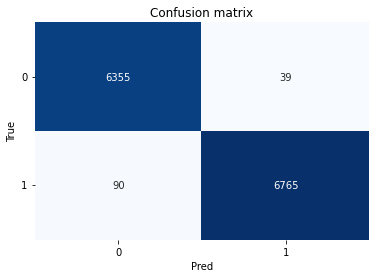

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Metrics
precision = metrics.precision_score(y_test, predicted_1)
recall = metrics.recall_score(y_test, predicted_1)
accuracy = metrics.accuracy_score(y_test, predicted_1)
print("Precision:",  round(precision,2))
print("Recall:",  round(recall,2))
print("Accuracy:",  round(accuracy,2))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_1)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

# **Model 2**

## Load Model

In [ ]:
model_2 = tf.keras.models.load_model('model_2.h5', custom_objects={"TFBertModel": transformers.TFBertModel.from_pretrained("bert-base-uncased", config = BertConfig(hidden_act="relu"))})

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


## Predict Data Test

In [ ]:
# test model
predicted_2 = model_2.predict(X_test)
predicted_2 = list(np.concatenate(predicted_2).flat)
predicted_2 = np.array([1 if i > 0.5 else 0 for i in predicted_2])

## Evaluate

Precision: 0.99
Recall: 1.0
Accuracy: 1.0


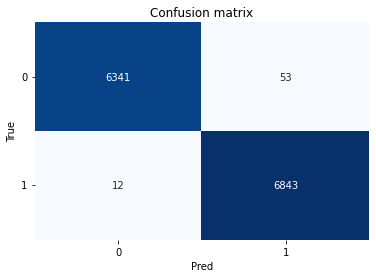

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Metrics
precision = metrics.precision_score(y_test, predicted_2)
recall = metrics.recall_score(y_test, predicted_2)
accuracy = metrics.accuracy_score(y_test, predicted_2)
print("Precision:",  round(precision,2))
print("Recall:",  round(recall,2))
print("Accuracy:",  round(accuracy,2))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_2)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

# **Model 3**

## Load Model

In [ ]:
model_3 = tf.keras.models.load_model('model_3.h5', custom_objects={"TFBertModel": transformers.TFBertModel.from_pretrained("bert-base-uncased", config = BertConfig(hidden_act="silu"))})

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


## Predict Data Test

In [ ]:
# test model
predicted_3 = model_3.predict(X_test)
predicted_3 = list(np.concatenate(predicted_3).flat)
predicted_3 = np.array([1 if i > 0.5 else 0 for i in predicted_3])

## Evaluate

Precision: 0.96
Recall: 0.79
Accuracy: 0.87


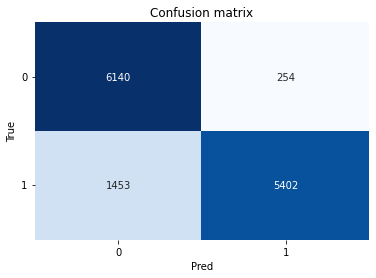

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Metrics
precision = metrics.precision_score(y_test, predicted_3)
recall = metrics.recall_score(y_test, predicted_3)
accuracy = metrics.accuracy_score(y_test, predicted_3)
print("Precision:",  round(precision,2))
print("Recall:",  round(recall,2))
print("Accuracy:",  round(accuracy,2))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted_3)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()